### Chatbot summary

https://chatgpt.com/share/6736a7c2-bebc-800c-bbaa-159acca1021d

### 1.

1.Simple Linear Regression models the relationship between a single predictor and a single outcome. Multiple Linear Regression models the relationship between multiple predictors and a single outcome. The Benefit of Multiple Linear Regression is that it captures the combined effect of several predictors, improving predictive accuracy and explaining more variance in y by accounting for additional influences that a single predictor might miss.

2.A continuous variable (e.g., height, age) takes on a range of values and allows the regression to estimate a line that captures the relationship between changes in this variable and changes in y. The form is y=β0+β1x+ϵ.
An indicator variable is categorical, typically coded as 0 or 1, representing the presence or absence of a characteristic (e.g., gender, treatment group). The regression form with an indicator is y=β0+β1D+ϵ where D is an indicator variable. Here, β1 shows the effect of the presence (1) versus the absence (0) of the characteristic. With a continuous variable, the slope β1 represents the change in y for each unit change in x. With an indicator variable, β1 represents the change in y when moving from one category (0) to the other (1).

3)Adding an indicator variable alongside a continuous variable allows the model to capture differences in intercepts based on the category of the indicator, essentially fitting separate regression lines for each category.
Simple Linear Regression: y=β0+β1x+ϵ
Multiple Linear Regression with Indicator: y=β0+β1x+β2D+ϵ
In the presence of an indicator, the model can separate the intercept for the two categories of the indicator variable, effectively modeling shifts in the relationship between y and x across these groups.

4)Adding an interaction term  allows the model to fit different slopes for each category of the indicator variable. The model form becomes y=β0+β1x+β2D+β3(xD)+ϵ where β3 represents the difference in slope between the two categories of D.
Model Behavior: The interaction term makes the relationship between y and x conditional on D. Instead of a uniform slope, each category of D has its own slope, capturing more nuanced patterns in the data.

5)When all predictors are indicator variables from a categorical variable with more than two levels (e.g., color with levels: red, blue, green), the model explains variations in y based solely on category membership, without any continuous trend. The form is: y=β0+β1D1+β2D2+⋯+βk−1Dk−1+ϵ. where k is the number of categories, and each Di is a binary indicator for one of the categories, with one category left out. This model uses binary encodings to represent each category, where each indicator variable reflects whether the observation belongs to a specific category. This structure ensures the model does not overparameterize by using one category as a baseline, and it fits separate intercepts for each category.

### 2.

The Outcome Variable is the sales, measuring the revenue or units sold as a result of advertising efforts.
The Predictor Variables are TV Advertising Spend, and Online Advertising Spend

There might be a synergistic effect between TV and online advertising. For example, spending on TV ads could amplify the effect of online ads, or vice versa. If this interaction is significant, the effectiveness of TV advertising on sales will depend on the level of online advertising spend and vice versa.

A model without an interaction term assumes that TV and online advertising each independently contribute to sales. The relationship can be expressed as:
Sales=β0+β1(TV Advertising Spend)+β2(Online Advertising Spend)+ϵ
Here, β1 captures the change in sales per unit increase in TV advertising, holding online advertising constant, and β2 captures the change in sales per unit increase in online advertising, holding TV advertising constant.

To capture the interaction effect, an additional term for the interaction between TV and online advertising spend is introduced:
Sales=β0+β1(TV Advertising Spend)+β2(Online Advertising Spend)+β3(TV Advertising Spend×Online Advertising Spend)+ϵ        
In this model β3 represents the interaction effect, capturing how the effectiveness of TV advertising changes depending on the level of online advertising spend, and vice versa. This interaction term allows the model to reflect that the effect of TV advertising on sales is not constant but depends on the amount spent on online advertising.

### 3.

### 4.

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [4]:
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        20:14:36   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model may have significant predictors that individually affect the outcome, but the overall model fit is low because there are likely additional factors driving the outcome that are not accounted for, which would increase the variability explained if they were included. This is why we observe both low r^2 that only explains 17.6% of the variability in the data and strong evidence for the significance of some individual predictors.

### 5.

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False


The code uses a 50/50 split for training and testing data, ensuring that half the dataset is used for model training (pokeaman_train) and the other half for testing (pokeaman_test). This setup allows us to evaluate both in-sample and out-of-sample performance.

It replaces any missing values in the "Type 2" column with "None" to avoid issues with missing data in later modeling steps.

In [6]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        20:14:53   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

model3 is a linear regression model where HP (Hit Points) is predicted based on only two features: Attack and Defense

In [7]:
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738


The In-sample R-squared measures how well the model fits the training data (pokeaman_train). It shows that 0.14771558304519894 of the variance in HP explained by Attack and Defense in the training data.

The Out-of-sample R-squared is computed on the test data (pokeaman_test), showing how well the model generalizes to unseen data. It shows the correlation between the predicted and actual HP values in the test set is 0.21208501873920738.

In [8]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        20:15:09   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1179      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9610    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8798    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

Model4 is a more complex model with multiple interaction terms involving six different features (Attack, Defense, Speed, Legendary, Sp. Def, and Sp. Atk).

In [9]:
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


Similar to model3, in-sample r^2 measures how well model4 fits the training data, while out-of-sample r^2 indicates how well it generalizes to new data. In this case, while the in-sample r^2 got better, since the out of sample r^2 got lower, it shows that the model can't generalize to the unseen data.

### 6.

In [8]:
# "Cond. No." WAS 343.0 WITHOUT to centering and scaling
model3_fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        20:39:30   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
from patsy import center, scale

model3_linear_form_center_scale = \
  'HP ~ scale(center(Attack)) + scale(center(Defense))' 
model_spec3_center_scale = smf.ols(formula=model3_linear_form_center_scale,
                                   data=pokeaman_train)
model3_center_scale_fit = model_spec3_center_scale.fit()
model3_center_scale_fit.summary()
# "Cond. No." is NOW 1.66 due to centering and scaling

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        20:39:30   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 69.3025      1.186     58.439      0.000      66.971      71.634
scale(center(Attack))      8.1099      1.340      6.051      0.000       5.475      10.745
scale(center(Defense))     2.9496      1.340      2.201      0.028       0.315       5.585
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         1.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
model4_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Defense))'
model4_linear_form_CS += ' * scale(center(Speed)) * Legendary' 
model4_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# Legendary is an indicator, so we don't center and scale that

model4_CS_spec = smf.ols(formula=model4_linear_form_CS, data=pokeaman_train)
model4_CS_fit = model4_CS_spec.fit()
model4_CS_fit.summary().tables[-1]  # Cond. No. is 2,250,000,000,000,000

# The condition number is still bad even after centering and scaling

Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.663
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.54e+16


In [11]:
# Just as the condition number was very bad to start with
model4_fit.summary().tables[-1]  # Cond. No. is 12,000,000,000,000,000


Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.664
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.20e+16


### 7. Discuss with a ChatBot the rationale and principles by which *model5_linear_form* is  extended and developed from *model3_fit* and *model4_fit*; *model6_linear_form* is  extended and developed from *model5_linear_form*; and *model7_linear_form* is  extended and developed from *model6_linear_form*; then, explain this breifly and consisely in your own words<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _We again include the **condition number** for the "centered and scaled" version of `model7_fit` to show that **multicollinearity** does not appear to be a major concern for this model (and the same would be true regarding `model6_fit` if the analogous "centered and scaled" version of the model was considered). While it is true that the **condition number** of `15.4` observed for `model7_fit` is perhaps "large", this would not be considered "vary large"._
>
> - _Regarding **condition numbers**, a ChatBot gave me cutoffs of `<30` not a big problem, up to `<300` maybe an issue, up to `<1000` definitely **multicollinearity**, and beyond that is pretty much likely to be "serious" problems with **multicollinearity**. Personally, cutoffs around `10`, `100`, and `1000` seem about right to me._
>
> _This question addresses the **model building** exercise using both an **evidence** based approach using **coefficient hypothesis testing** as well as examinations of **generalizability** using comparisions of "in sample" versus "out of sample" **model performance** metrics. Through these tools, different models were considered, extended, and developed, finally arriving at `model7_fit`. When we feel we can improve the **model performance** in a **generalizable** manner, then all relatively underperforming models are said to be **underfit**, meaning that they do not leverage all the **predictive associations** available to improve **predictions**._
> 
> _While the previous "Question 6" above introduced and explored the impact of **multicollinearity** in the **multiple linear regression** context_ 
>     
> - _(whereby "the effects" of multiple **predictor variables** are "tangled up" and therefore do not allow the model to reliably determine contribution attributions between the **predictor variables**, which potentially leads to poor **estimation** of their "effects" in the model, which in turn is the problematic state of affairs which leads to a lack of **generalizability** in such high **multicollinearity** settings)_
> 
> _there is still the (actually even more important) consideration of the actual **evidence** of **predictive associations**. The question is whether or not there is sufficient **evidence** in the data backing up the **estimated** fit of the **linear form** specification. Quantifying the **evidence** for a **estimated** model is a separate question from the problem of **multicollinearity**, the assessment of which is actually the primary purpose of **multiple linear regression** methodology._
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot); but, if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_ 
    
</details>    

In [12]:
# Here's something a little more reasonable...
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     4.948
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           9.48e-19
Time:                        20:39:30   Log-Likelihood:                -1765.0
No. Observations:                 400   AIC:                             3624.
Df Residuals:                     353   BIC:                             3812.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     10.1046     14.957      0.676      0.500     -19.312      39.521
Legendary[T.True]             -3.2717      4.943     -0.662      0.508     -12.992       6.449
C(Generation)[T.2]             9.2938      4.015      2.315      0.021       1.398      17.189
C(Generation)[T.3]             2.3150      3.915      0.591      0.555      -5.385      10.015
C(Generation)[T.4]             4.8353      4.149      1.165      0.245      -3.325      12.995
C(Generation)[T.5]            11.4838      3.960      2.900      0.004       3.696      19.272
C(Generation)[T.6]             4.9206      4.746      1.037      0.300      -4.413      14.254
C(Q("Type 1"))[T.Dark]        -1.4155      6.936     -0.204      0.838     -15.057      12.226
C(Q("Type 1"))[T.Dragon]       0.8509      6.900      0.123      0.902     -12.720      14.422
C(Q("Type 1"))[T.Electric]    -6.3641      6.537     -0.974      0.331     -19.220       6.491
C(Q("Type 1"))[T.Fairy]       -1.9486     10.124     -0.192      0.847     -21.859      17.962
C(Q("Type 1"))[T.Fighting]     7.0308      7.432      0.946      0.345      -7.586      21.648
C(Q("Type 1"))[T.Fire]         3.0779      6.677      0.461      0.645     -10.055      16.210
C(Q("Type 1"))[T.Flying]      -2.1231     22.322     -0.095      0.924     -46.025      41.779
C(Q("Type 1"))[T.Ghost]        5.7343      8.488      0.676      0.500     -10.960      22.429
C(Q("Type 1"))[T.Grass]        3.3275      5.496      0.605      0.545      -7.481      14.136
C(Q("Type 1"))[T.Ground]       9.5118      7.076      1.344      0.180      -4.404      23.428
C(Q("Type 1"))[T.Ice]         -0.9313      7.717     -0.121      0.904     -16.108      14.246
C(Q("Type 1"))[T.Normal]      18.4816      5.312      3.479      0.001       8.034      28.929
C(Q("Type 1"))[T.Poison]       8.3411      7.735      1.078      0.282      -6.871      23.554
C(Q("Type 1"))[T.Psychic]      1.8061      6.164      0.293      0.770     -10.317      13.930
C(Q("Type 1"))[T.Rock]        -3.8558      6.503     -0.593      0.554     -16.645       8.933
C(Q("Type 1"))[T.Steel]       -4.0053      8.044     -0.498      0.619     -19.826      11.816
C(Q("Type 1"))[T.Water]        9.7988      5.166      1.897      0.059      -0.361      19.959
C(Q("Type 2"))[T.Dark]         5.8719     15.185      0.387      0.699     -23.993      35.737
C(Q("Type 2"))[T.Dragon]      13.2777     14.895      0.891      0.373     -16.016      42.571
C(Q("Type 2"))[T.Electric]    14.3228     17.314      0.827      0.409     -19.728      48.374
C(Q("Type 2"))[T.Fairy]        2.8426     14.268      0.199      0.842     -25.218      30.903
C(Q("Type 2"))[T.Fighting]     1.9741     14.089      0.140      0.889     -25.735      29.683
C(Q("Type 2"))[T.Fire]         0.2001     1

In [13]:
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)

'In sample' R-squared:     0.3920134083531893
'Out of sample' R-squared: 0.30015614488652215


In [14]:
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     24.36
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           2.25e-30
Time:                        20:39:31   Log-Likelihood:                -1783.6
No. Observations:                 400   AIC:                             3585.
Df Residuals:                     391   BIC:                             3621.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             22.8587      3.876      5.897      0.000      15.238      30.479
I(Q("Type 1") == "Normal")[T.True]    17.5594      3.339      5.258      0.000      10.994      24.125
I(Q("Type 1") == "Water")[T.True]      9.0301      3.172      2.847      0.005       2.794      15.266
I(Generation == 2)[T.True]             6.5293      2.949      2.214      0.027       0.732      12.327
I(Generation == 5)[T.True]             8.4406      2.711      3.114      0.002       3.112      13.770
Attack                                 0.2454      0.037      6.639      0.000       0.173       0.318
Speed                                 -0.1370      0.045     -3.028      0.003      -0.226      -0.048
Q("Sp. Def")                           0.3002      0.045      6.662      0.000       0.212       0.389
Q("Sp. Atk")                           0.1192      0.042      2.828      0.005       0.036       0.202
==============================================================================
Omnibus:                      271.290   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4238.692
Skew:                           2.651   Prob(JB):                         0.00
Kurtosis:                      18.040   Cond. No.                         618.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)

'In sample' R-squared:     0.3326310334310908
'Out of sample' R-squared: 0.29572460427079933


In [16]:
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     12.16
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.20e-29
Time:                        20:39:31   Log-Likelihood:                -1769.5
No. Observations:                 400   AIC:                             3579.
Df Residuals:                     380   BIC:                             3659.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 95.1698     34.781      2.736      0.007      26.783     163.556
I(Q("Type 1") == "Normal")[T.True]        18.3653      3.373      5.445      0.000      11.733      24.997
I(Q("Type 1") == "Water")[T.True]          9.2913      3.140      2.959      0.003       3.117      15.466
I(Generation == 2)[T.True]                 7.0711      2.950      2.397      0.017       1.271      12.871
I(Generation == 5)[T.True]                 7.8557      2.687      2.923      0.004       2.572      13.140
Attack                                    -0.6975      0.458     -1.523      0.129      -1.598       0.203
Speed                                     -1.8147      0.554     -3.274      0.001      -2.905      -0.725
Attack:Speed                               0.0189      0.007      2.882      0.004       0.006       0.032
Q("Sp. Def")                              -0.5532      0.546     -1.013      0.312      -1.627       0.521
Attack:Q("Sp. Def")                        0.0090      0.007      1.311      0.191      -0.004       0.023
Speed:Q("Sp. Def")                         0.0208      0.008      2.571      0.011       0.005       0.037
Attack:Speed:Q("Sp. Def")                 -0.0002   9.06e-05     -2.277      0.023      -0.000   -2.82e-05
Q("Sp. Atk")                              -0.7277      0.506     -1.439      0.151      -1.722       0.267
Attack:Q("Sp. Atk")                        0.0136      0.005      2.682      0.008       0.004       0.024
Speed:Q("Sp. Atk")                         0.0146      0.007      2.139      0.033       0.001       0.028
Attack:Speed:Q("Sp. Atk")                 -0.0002    5.4e-05     -3.383      0.001      -0.000   -7.65e-05
Q("Sp. Def"):Q("Sp. Atk")                  0.0103      0.007      1.516      0.130      -0.003       0.024
Attack:Q("Sp. Def"):Q("Sp. Atk")          -0.0001   6.71e-05     -2.119      0.035      -0.000   -1.03e-05
Speed:Q("Sp. Def"):Q("Sp. Atk")           -0.0002   8.82e-05     -2.075      0.039      -0.000   -9.62e-06
Attack:Speed:Q("Sp. Def"):Q("Sp. Atk")   2.03e-06   7.42e-07      2.734      0.007     5.7e-07    3.49e-06
==============================================================================
Omnibus:                      252.300   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3474.611
Skew:                           2.438   Prob(JB):                         0.00
Kurtosis:                      16.590   Cond. No.                     2.34e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+09. Thi

In [17]:
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)

'In sample' R-squared:     0.37818209127432456
'Out of sample' R-squared: 0.35055389205977444


In [18]:
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,15.4


In [19]:
# "Cond. No." WAS 2,340,000,000 WITHOUT to centering and scaling
model7_fit.summary().tables[-1]

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,2.34e+09


The formula model4_linear_form creates a high-dimensional design matrix model4_spec.exog by including numerous interaction terms among the six predictors.
These interactions result in a highly multicollinear matrix, which leads to overfitting, instability, and poor out-of-sample generalization of the model (model4_fit).
The high multicollinearity observed in np.corrcoef(model4_spec.exog) directly contributes to the lack of predictive generalization because the model becomes "overly specific" to the training data, capturing noise and spurious relationships that do not hold for unseen data.

### 7.

In [12]:
# Here's something a little more reasonable...
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     4.948
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           9.48e-19
Time:                        20:39:30   Log-Likelihood:                -1765.0
No. Observations:                 400   AIC:                             3624.
Df Residuals:                     353   BIC:                             3812.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     10.1046     14.957      0.676      0.500     -19.312      39.521
Legendary[T.True]             -3.2717      4.943     -0.662      0.508     -12.992       6.449
C(Generation)[T.2]             9.2938      4.015      2.315      0.021       1.398      17.189
C(Generation)[T.3]             2.3150      3.915      0.591      0.555      -5.385      10.015
C(Generation)[T.4]             4.8353      4.149      1.165      0.245      -3.325      12.995
C(Generation)[T.5]            11.4838      3.960      2.900      0.004       3.696      19.272
C(Generation)[T.6]             4.9206      4.746      1.037      0.300      -4.413      14.254
C(Q("Type 1"))[T.Dark]        -1.4155      6.936     -0.204      0.838     -15.057      12.226
C(Q("Type 1"))[T.Dragon]       0.8509      6.900      0.123      0.902     -12.720      14.422
C(Q("Type 1"))[T.Electric]    -6.3641      6.537     -0.974      0.331     -19.220       6.491
C(Q("Type 1"))[T.Fairy]       -1.9486     10.124     -0.192      0.847     -21.859      17.962
C(Q("Type 1"))[T.Fighting]     7.0308      7.432      0.946      0.345      -7.586      21.648
C(Q("Type 1"))[T.Fire]         3.0779      6.677      0.461      0.645     -10.055      16.210
C(Q("Type 1"))[T.Flying]      -2.1231     22.322     -0.095      0.924     -46.025      41.779
C(Q("Type 1"))[T.Ghost]        5.7343      8.488      0.676      0.500     -10.960      22.429
C(Q("Type 1"))[T.Grass]        3.3275      5.496      0.605      0.545      -7.481      14.136
C(Q("Type 1"))[T.Ground]       9.5118      7.076      1.344      0.180      -4.404      23.428
C(Q("Type 1"))[T.Ice]         -0.9313      7.717     -0.121      0.904     -16.108      14.246
C(Q("Type 1"))[T.Normal]      18.4816      5.312      3.479      0.001       8.034      28.929
C(Q("Type 1"))[T.Poison]       8.3411      7.735      1.078      0.282      -6.871      23.554
C(Q("Type 1"))[T.Psychic]      1.8061      6.164      0.293      0.770     -10.317      13.930
C(Q("Type 1"))[T.Rock]        -3.8558      6.503     -0.593      0.554     -16.645       8.933
C(Q("Type 1"))[T.Steel]       -4.0053      8.044     -0.498      0.619     -19.826      11.816
C(Q("Type 1"))[T.Water]        9.7988      5.166      1.897      0.059      -0.361      19.959
C(Q("Type 2"))[T.Dark]         5.8719     15.185      0.387      0.699     -23.993      35.737
C(Q("Type 2"))[T.Dragon]      13.2777     14.895      0.891      0.373     -16.016      42.571
C(Q("Type 2"))[T.Electric]    14.3228     17.314      0.827      0.409     -19.728      48.374
C(Q("Type 2"))[T.Fairy]        2.8426     14.268      0.199      0.842     -25.218      30.903
C(Q("Type 2"))[T.Fighting]     1.9741     14.089      0.140      0.889     -25.735      29.683
C(Q("Type 2"))[T.Fire]         0.2001     1

In [13]:
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)

'In sample' R-squared:     0.3920134083531893
'Out of sample' R-squared: 0.30015614488652215


In [14]:
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     24.36
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           2.25e-30
Time:                        20:39:31   Log-Likelihood:                -1783.6
No. Observations:                 400   AIC:                             3585.
Df Residuals:                     391   BIC:                             3621.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             22.8587      3.876      5.897      0.000      15.238      30.479
I(Q("Type 1") == "Normal")[T.True]    17.5594      3.339      5.258      0.000      10.994      24.125
I(Q("Type 1") == "Water")[T.True]      9.0301      3.172      2.847      0.005       2.794      15.266
I(Generation == 2)[T.True]             6.5293      2.949      2.214      0.027       0.732      12.327
I(Generation == 5)[T.True]             8.4406      2.711      3.114      0.002       3.112      13.770
Attack                                 0.2454      0.037      6.639      0.000       0.173       0.318
Speed                                 -0.1370      0.045     -3.028      0.003      -0.226      -0.048
Q("Sp. Def")                           0.3002      0.045      6.662      0.000       0.212       0.389
Q("Sp. Atk")                           0.1192      0.042      2.828      0.005       0.036       0.202
==============================================================================
Omnibus:                      271.290   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4238.692
Skew:                           2.651   Prob(JB):                         0.00
Kurtosis:                      18.040   Cond. No.                         618.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)

'In sample' R-squared:     0.3326310334310908
'Out of sample' R-squared: 0.29572460427079933


In [16]:
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     12.16
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.20e-29
Time:                        20:39:31   Log-Likelihood:                -1769.5
No. Observations:                 400   AIC:                             3579.
Df Residuals:                     380   BIC:                             3659.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 95.1698     34.781      2.736      0.007      26.783     163.556
I(Q("Type 1") == "Normal")[T.True]        18.3653      3.373      5.445      0.000      11.733      24.997
I(Q("Type 1") == "Water")[T.True]          9.2913      3.140      2.959      0.003       3.117      15.466
I(Generation == 2)[T.True]                 7.0711      2.950      2.397      0.017       1.271      12.871
I(Generation == 5)[T.True]                 7.8557      2.687      2.923      0.004       2.572      13.140
Attack                                    -0.6975      0.458     -1.523      0.129      -1.598       0.203
Speed                                     -1.8147      0.554     -3.274      0.001      -2.905      -0.725
Attack:Speed                               0.0189      0.007      2.882      0.004       0.006       0.032
Q("Sp. Def")                              -0.5532      0.546     -1.013      0.312      -1.627       0.521
Attack:Q("Sp. Def")                        0.0090      0.007      1.311      0.191      -0.004       0.023
Speed:Q("Sp. Def")                         0.0208      0.008      2.571      0.011       0.005       0.037
Attack:Speed:Q("Sp. Def")                 -0.0002   9.06e-05     -2.277      0.023      -0.000   -2.82e-05
Q("Sp. Atk")                              -0.7277      0.506     -1.439      0.151      -1.722       0.267
Attack:Q("Sp. Atk")                        0.0136      0.005      2.682      0.008       0.004       0.024
Speed:Q("Sp. Atk")                         0.0146      0.007      2.139      0.033       0.001       0.028
Attack:Speed:Q("Sp. Atk")                 -0.0002    5.4e-05     -3.383      0.001      -0.000   -7.65e-05
Q("Sp. Def"):Q("Sp. Atk")                  0.0103      0.007      1.516      0.130      -0.003       0.024
Attack:Q("Sp. Def"):Q("Sp. Atk")          -0.0001   6.71e-05     -2.119      0.035      -0.000   -1.03e-05
Speed:Q("Sp. Def"):Q("Sp. Atk")           -0.0002   8.82e-05     -2.075      0.039      -0.000   -9.62e-06
Attack:Speed:Q("Sp. Def"):Q("Sp. Atk")   2.03e-06   7.42e-07      2.734      0.007     5.7e-07    3.49e-06
==============================================================================
Omnibus:                      252.300   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3474.611
Skew:                           2.438   Prob(JB):                         0.00
Kurtosis:                      16.590   Cond. No.                     2.34e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+09. Thi

In [17]:
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)

'In sample' R-squared:     0.37818209127432456
'Out of sample' R-squared: 0.35055389205977444


In [18]:
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,15.4


In [19]:
# "Cond. No." WAS 2,340,000,000 WITHOUT to centering and scaling
model7_fit.summary().tables[-1]

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,2.34e+09


Model5 reduced complexity by removing interactions and focusing on categorical variables.

Model6 further refined the model by focusing on significant predictors.

Model7 and Model7_CS reintroduced key interactions but limited them to the most impactful predictors, and model7_CS addressed multicollinearity directly by centering and scaling continuous variables.

### 8.

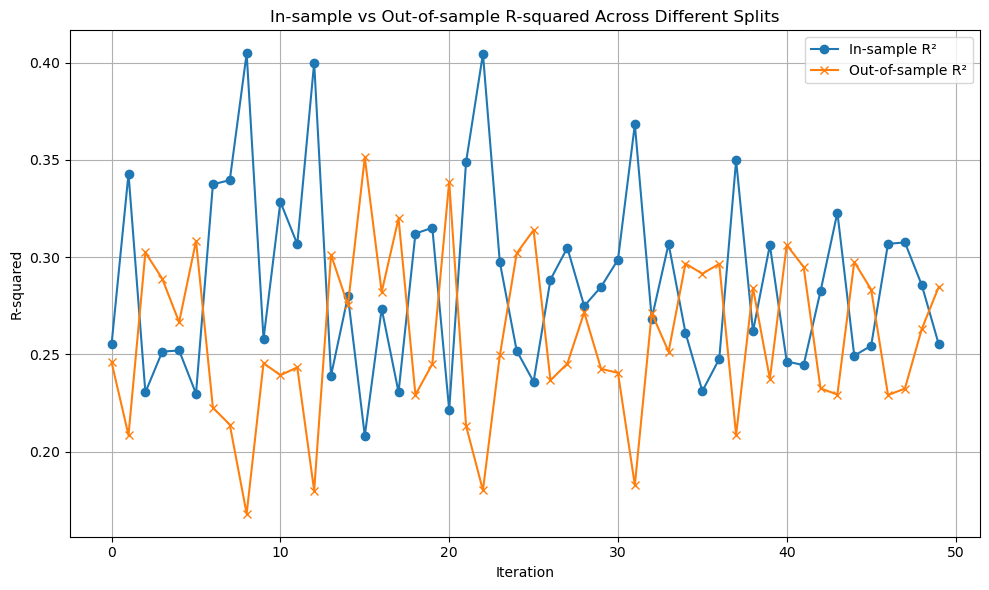

Average In-sample R²: 0.287
Average Out-of-sample R²: 0.259
Standard Deviation of In-sample R²: 0.048
Standard Deviation of Out-of-sample R²: 0.042


In [12]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Example model formula (use the same model each iteration)
model_formula = 'HP ~ Attack + Defense + Speed + Q("Sp. Def") + Q("Sp. Atk") + Legendary'

# Initialize lists to store R-squared values
in_sample_scores = []
out_sample_scores = []
num_iterations = 50  # Number of train-test splits

# Loop over multiple random train-test splits
for i in range(num_iterations):
    # Split the data randomly each time
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5, random_state=np.random.randint(10000))
    
    # Fit model to training data
    model = smf.ols(formula=model_formula, data=pokeaman_train).fit()
    
    # Calculate in-sample R-squared
    in_sample_r2 = model.rsquared
    in_sample_scores.append(in_sample_r2)
    
    # Calculate out-of-sample R-squared
    y_test = pokeaman_test['HP']
    y_pred_test = model.predict(pokeaman_test)
    out_sample_r2 = np.corrcoef(y_test, y_pred_test)[0, 1]**2
    out_sample_scores.append(out_sample_r2)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), in_sample_scores, marker='o', linestyle='-', label='In-sample R²')
plt.plot(range(num_iterations), out_sample_scores, marker='x', linestyle='-', label='Out-of-sample R²')
plt.xlabel('Iteration')
plt.ylabel('R-squared')
plt.title('In-sample vs Out-of-sample R-squared Across Different Splits')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Additional summary statistics
print(f"Average In-sample R²: {np.mean(in_sample_scores):.3f}")
print(f"Average Out-of-sample R²: {np.mean(out_sample_scores):.3f}")
print(f"Standard Deviation of In-sample R²: {np.std(in_sample_scores):.3f}")
print(f"Standard Deviation of Out-of-sample R²: {np.std(out_sample_scores):.3f}")


The model formula remains constant (HP ~ Attack + Defense + Speed + Q("Sp. Def") + Q("Sp. Atk") + Legendary), so we’re measuring variability in performance due to different data splits.

We iterate num_iterations times, where each iteration:
    Randomly splits pokeaman into training and test sets.
    Fits the same model formula to the training set.
    Calculates "in-sample" R2 from the training data.
    Calculates "out-of-sample" R2 from the test data.

### 9.

In [20]:
model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.35055389205977444 (original)
'In sample' R-squared:     0.5726118179916575 (gen1_predict_future)
'Out of sample' R-squared: 0.11151363354803218 (gen1_predict_future)


In [21]:
model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.35055389205977444 (original)
'In sample' R-squared:     0.3904756578094535 (gen1to5_predict_future)
'Out of sample' R-squared: 0.23394915464343125 (gen1to5_predict_future)


In [22]:
model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.29572460427079933 (original)
'In sample' R-squared:     0.4433880517727282 (gen1_predict_future)
'Out of sample' R-squared: 0.1932858534276128 (gen1_predict_future)


In [23]:
model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.29572460427079933 (original)
'In sample' R-squared:     0.33517279824114776 (gen1to5_predict_future)
'Out of sample' R-squared: 0.26262690178799936 (gen1to5_predict_future)


Trade-offs in Training Data Selection: Including a broader set of generations improves generalization but risks incorporating variability that could reduce in-sample performance.
Complex Models (with Interactions): While interactions in Model 7 increase the in-sample R2, they may overfit to generation-specific patterns, thus harming out-of-sample performance when tested on future generations.
Implications for Model Generalization: If the goal is to predict for new generations, training on a comprehensive dataset of previous generations is beneficial. However, one should avoid overly complex models that could capture non-generalizable patterns unique to the training data.